In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_california_housing  # Alternative dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MEDV'] = california.target 


In [4]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64


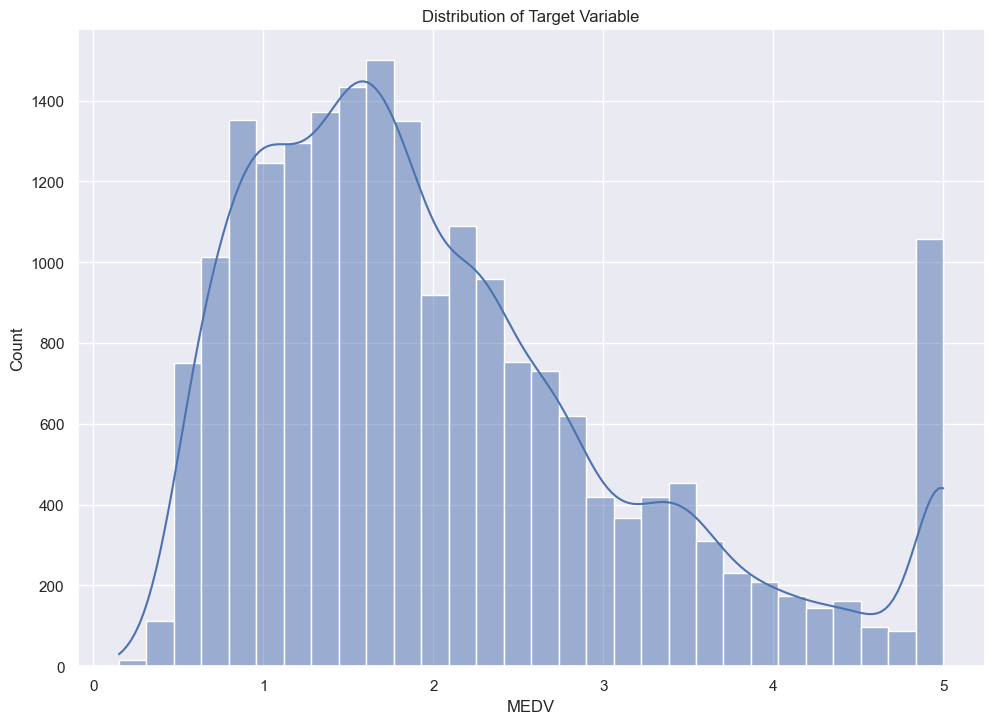

In [5]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title("Distribution of Target Variable")
plt.show()


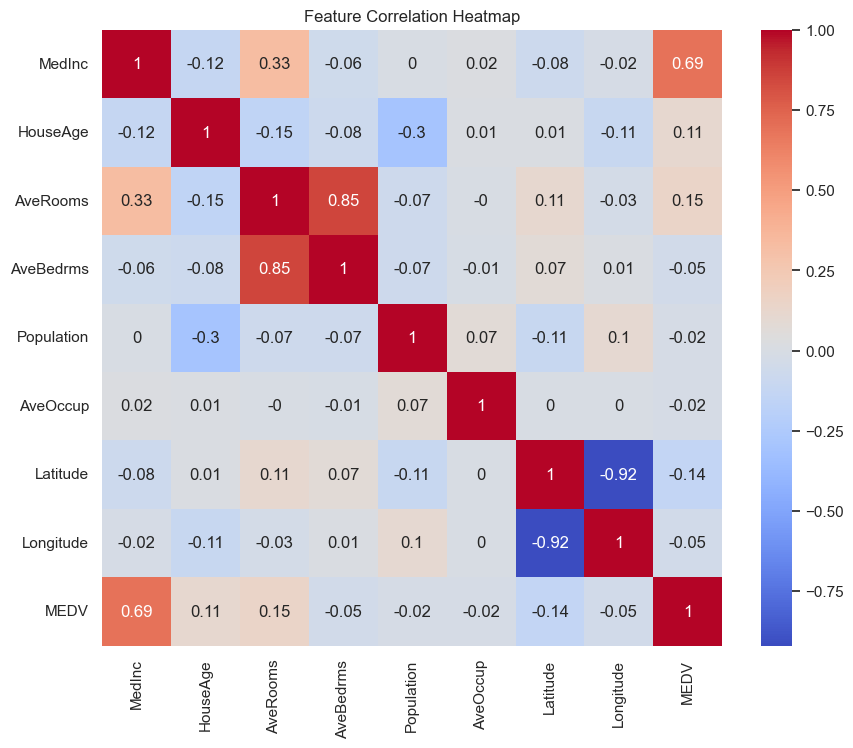

In [6]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
features = ["AveRooms", "AveOccup"]
target = data["MEDV"]

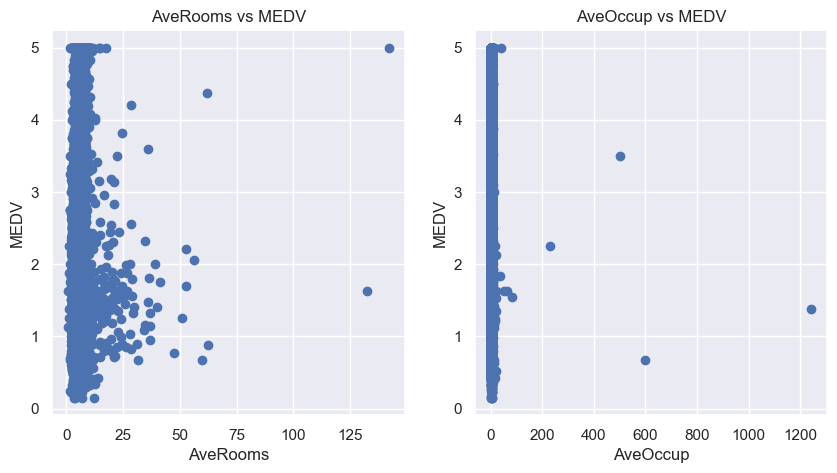

In [8]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(data[col], target, marker='o')
    plt.title(f"{col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel("MEDV")

In [9]:
plt.show()

In [10]:
X = data[["AveRooms", "AveOccup"]]
Y = data["MEDV"]


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:

model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [13]:
Y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 1.29
